Starting KNN Classifier Analysis...
Loading Iris dataset...
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']

=== DATA EXPLORATION ===
First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             

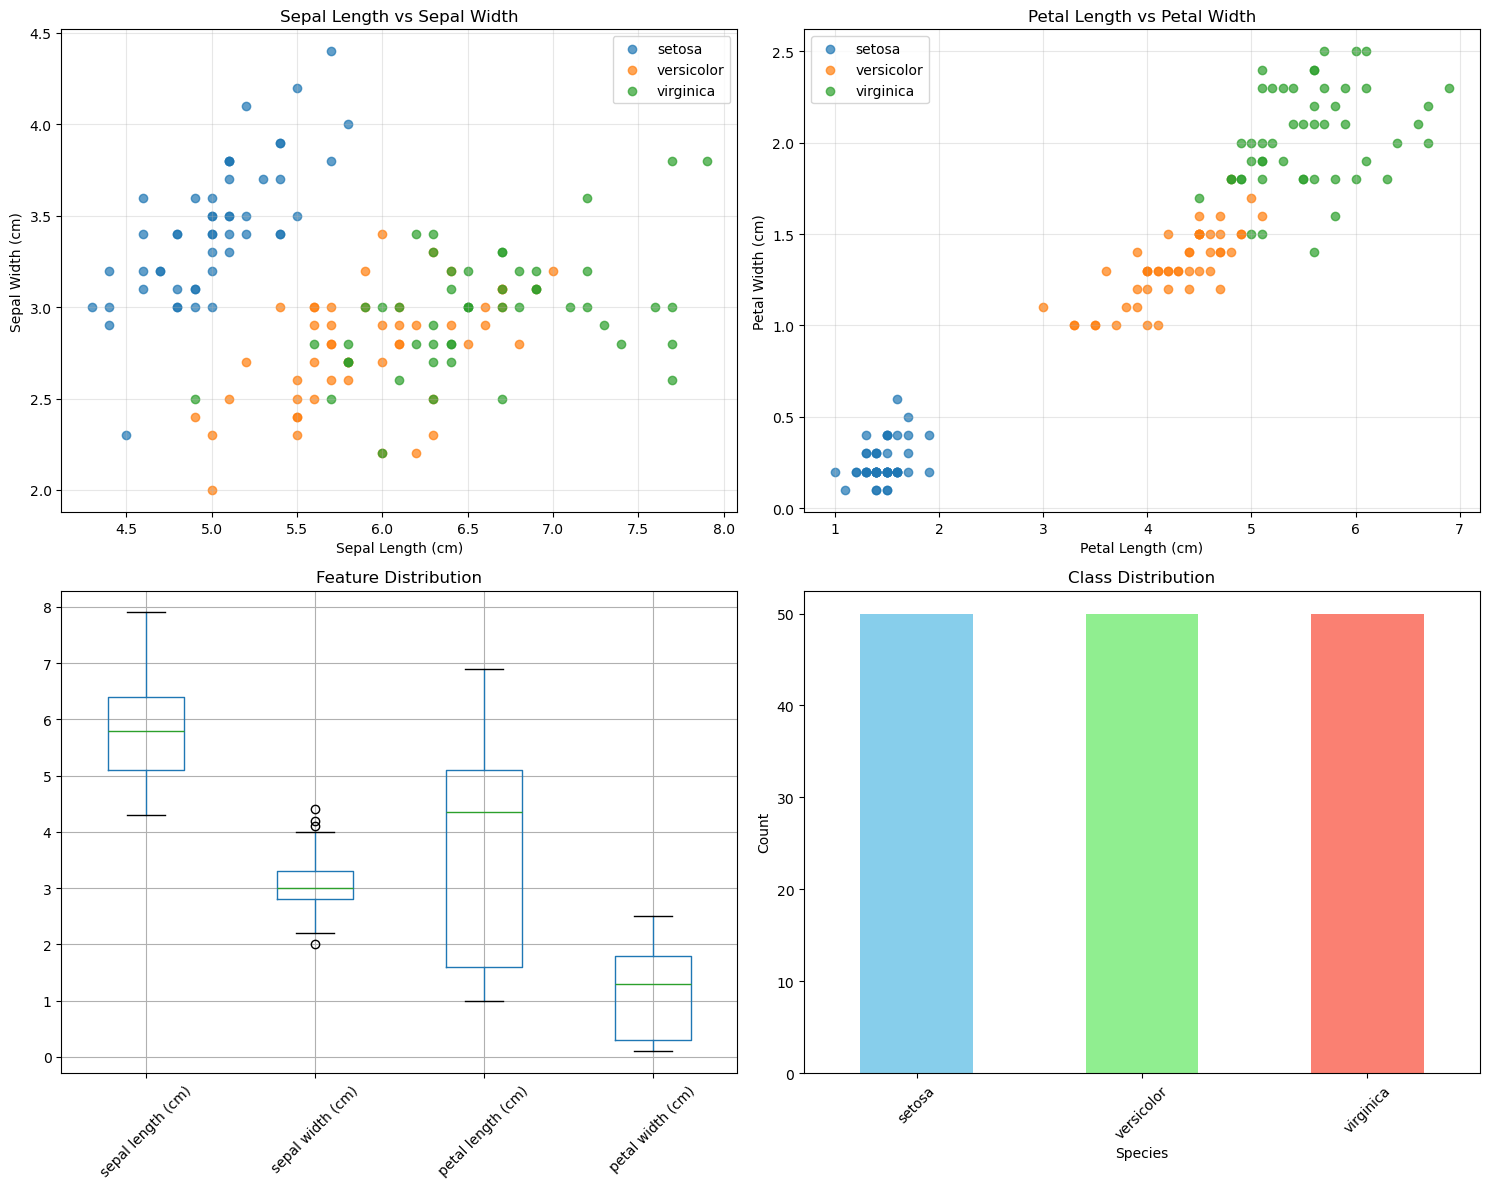


=== DATA PREPARATION ===
Training set size: (105, 4)
Test set size: (45, 4)
Features scaled using StandardScaler

=== MODEL TRAINING ===

=== FINDING OPTIMAL K ===


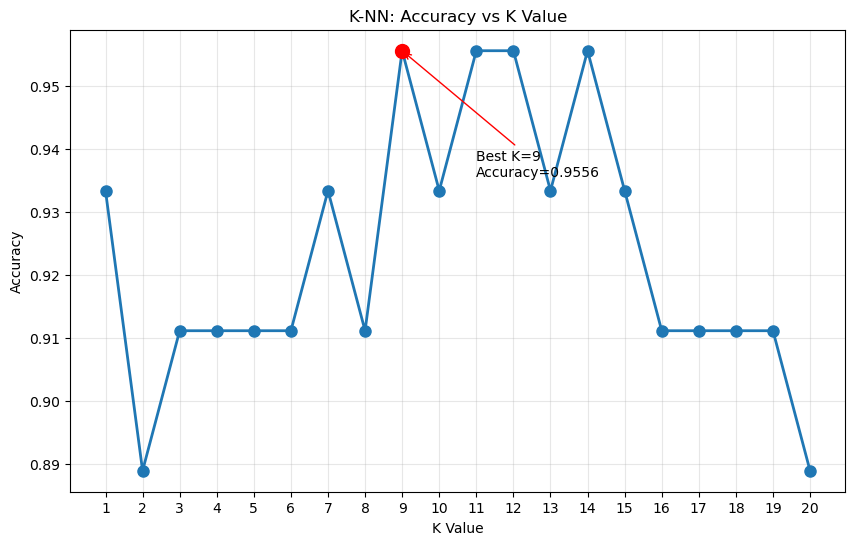

Optimal K value: 9 with accuracy: 0.9556
KNN model trained with K=9

=== MODEL EVALUATION ===
Test Accuracy: 0.9556

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



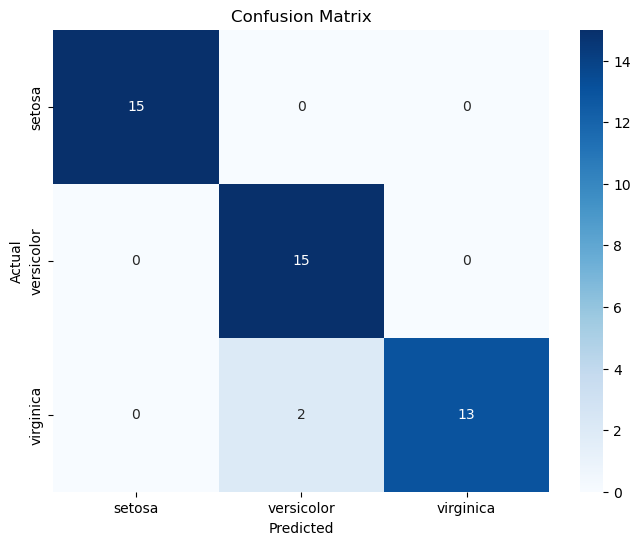


Analysis completed successfully!
Final Test Accuracy: 0.9556


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

class KNNClassifierProject:
    def __init__(self):
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = StandardScaler()
        self.knn_model = None
        self.predictions = None
        
    def load_data(self):
        """Load the Iris dataset"""
        print("Loading Iris dataset...")
        iris = load_iris()
        self.X = iris.data
        self.y = iris.target
        self.feature_names = iris.feature_names
        self.target_names = iris.target_names
        
        # Create DataFrame for better visualization
        self.df = pd.DataFrame(self.X, columns=self.feature_names)
        self.df['target'] = self.y
        self.df['species'] = [self.target_names[i] for i in self.y]
        
        print(f"Dataset shape: {self.df.shape}")
        print(f"Features: {self.feature_names}")
        print(f"Classes: {self.target_names}")
        
    def explore_data(self):
        """Explore the dataset"""
        print("\n=== DATA EXPLORATION ===")
        print("First 5 rows:")
        print(self.df.head())
        
        print("\nDataset info:")
        print(self.df.info())
        
        print("\nStatistical summary:")
        print(self.df.describe())
        
        print("\nClass distribution:")
        print(self.df['species'].value_counts())
        
    def visualize_data(self):
        """Create visualizations"""
        print("\n=== DATA VISUALIZATION ===")
        
        # Create subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Pairplot of features
        plt.subplot(2, 2, 1)
        for i, species in enumerate(self.target_names):
            species_data = self.df[self.df['species'] == species]
            plt.scatter(species_data['sepal length (cm)'], 
                       species_data['sepal width (cm)'], 
                       label=species, alpha=0.7)
        plt.xlabel('Sepal Length (cm)')
        plt.ylabel('Sepal Width (cm)')
        plt.title('Sepal Length vs Sepal Width')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.subplot(2, 2, 2)
        for i, species in enumerate(self.target_names):
            species_data = self.df[self.df['species'] == species]
            plt.scatter(species_data['petal length (cm)'], 
                       species_data['petal width (cm)'], 
                       label=species, alpha=0.7)
        plt.xlabel('Petal Length (cm)')
        plt.ylabel('Petal Width (cm)')
        plt.title('Petal Length vs Petal Width')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Box plots
        plt.subplot(2, 2, 3)
        self.df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 
                               'petal length (cm)', 'petal width (cm)'], ax=axes[1,0])
        plt.title('Feature Distribution')
        plt.xticks(rotation=45)
        
        # Class distribution
        plt.subplot(2, 2, 4)
        self.df['species'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
        plt.title('Class Distribution')
        plt.xlabel('Species')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.savefig('data_visualization.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    def prepare_data(self):
        """Prepare data for training"""
        print("\n=== DATA PREPARATION ===")
        
        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.3, random_state=42, stratify=self.y
        )
        
        print(f"Training set size: {self.X_train.shape}")
        print(f"Test set size: {self.X_test.shape}")
        
        # Scale the features
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)
        
        print("Features scaled using StandardScaler")
        
    def find_optimal_k(self):
        """Find optimal K value"""
        print("\n=== FINDING OPTIMAL K ===")
        
        k_range = range(1, 21)
        accuracies = []
        
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(self.X_train_scaled, self.y_train)
            pred = knn.predict(self.X_test_scaled)
            accuracies.append(accuracy_score(self.y_test, pred))
        
        # Plot K vs Accuracy
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, accuracies, marker='o', linewidth=2, markersize=8)
        plt.xlabel('K Value')
        plt.ylabel('Accuracy')
        plt.title('K-NN: Accuracy vs K Value')
        plt.grid(True, alpha=0.3)
        plt.xticks(k_range)
        
        # Mark the best K
        best_k = k_range[np.argmax(accuracies)]
        best_accuracy = max(accuracies)
        plt.scatter(best_k, best_accuracy, color='red', s=100, zorder=5)
        plt.annotate(f'Best K={best_k}\nAccuracy={best_accuracy:.4f}', 
                    xy=(best_k, best_accuracy), xytext=(best_k+2, best_accuracy-0.02),
                    arrowprops=dict(arrowstyle='->', color='red'))
        
        plt.savefig('k_optimization.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"Optimal K value: {best_k} with accuracy: {best_accuracy:.4f}")
        return best_k
        
    def train_model(self, k=None):
        """Train the KNN model"""
        print("\n=== MODEL TRAINING ===")
        
        if k is None:
            k = self.find_optimal_k()
        
        self.knn_model = KNeighborsClassifier(n_neighbors=k)
        self.knn_model.fit(self.X_train_scaled, self.y_train)
        
        print(f"KNN model trained with K={k}")
        
    def evaluate_model(self):
        """Evaluate the model performance"""
        print("\n=== MODEL EVALUATION ===")
        
        # Make predictions
        self.predictions = self.knn_model.predict(self.X_test_scaled)
        
        # Calculate accuracy
        accuracy = accuracy_score(self.y_test, self.predictions)
        print(f"Test Accuracy: {accuracy:.4f}")
        
        # Classification report
        print("\nClassification Report:")
        print(classification_report(self.y_test, self.predictions, 
                                  target_names=self.target_names))
        
        # Confusion Matrix
        cm = confusion_matrix(self.y_test, self.predictions)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.target_names, 
                   yticklabels=self.target_names)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return accuracy
        
    def run_complete_analysis(self):
        """Run the complete KNN analysis"""
        print("Starting KNN Classifier Analysis...")
        print("="*50)
        
        self.load_data()
        self.explore_data()
        self.visualize_data()
        self.prepare_data()
        self.train_model()
        accuracy = self.evaluate_model()
        
        print("\n" + "="*50)
        print("Analysis completed successfully!")
        print(f"Final Test Accuracy: {accuracy:.4f}")
        
        return accuracy

# Run the complete analysis
if __name__ == "__main__":
    knn_project = KNNClassifierProject()
    final_accuracy = knn_project.run_complete_analysis()